<a href="https://colab.research.google.com/github/kumarchandan/100-days-of-deep-learning/blob/master/day-6/Day_6_Building_Complex_Models_Using_the_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Complex Models Using the Functional API

## California Housing Dataset

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()


In [2]:
housing

{'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geograp

In [3]:
print(housing.feature_names)
# features: 8
print(housing.data.shape)
# target
print(housing.target.shape)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
(20640, 8)
(20640,)


In [4]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42) # default 25% split

In [5]:
print(X_train_full.shape)
print(y_train_full.shape)
print(X_test.shape)
print(y_test.shape)

(15480, 8)
(15480,)
(5160, 8)
(5160,)


In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(11610, 8)
(11610,)
(3870, 8)
(3870,)


In [8]:
# Values before transformation
X_train[0]

array([ 3.52140000e+00,  1.50000000e+01,  3.04994451e+00,  1.10654828e+00,
        1.44700000e+03,  1.60599334e+00,  3.76300000e+01, -1.22430000e+02])

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffb932e8128>,
      dtype=object)

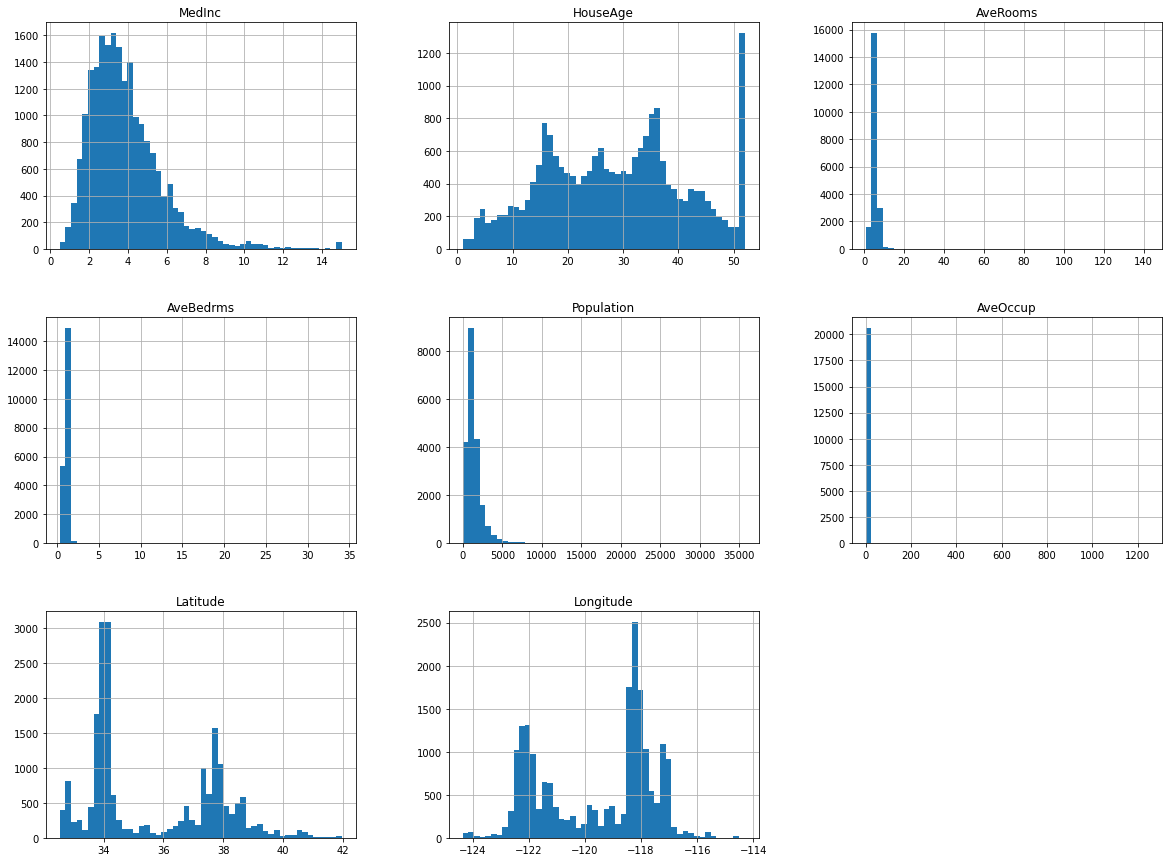

In [22]:
housing_df.hist(bins=50, figsize=(20, 15))

In [ ]:


X_train_full.hist

In [9]:
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train) # fit().transform() - fit() calculates params required for z

X_valid = scalar.transform(X_valid)
X_test = scalar.transform(X_test)


In [10]:
# transformed values
X_train[0]

array([-0.19397883, -1.07781319, -0.94338545,  0.01485314,  0.02073335,
       -0.57291624,  0.92926047, -1.42215523])

In [11]:
import tensorflow as tf
from tensorflow import keras

In [12]:
X_train.shape[1:]

(8,)

# With Wide and Deep Neural network

In [13]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_], outputs=[output])

```
- create a Input layer and specify the input_shape
- create a Dense layer with 30 neurons, using the ReLU activation
- we call this dense layer like a function, that's why it's called a functional api
- By passing the Input layer, we are telling keras how to connect the layers
- Then we create the second Hidden layer, and pass the output of the first hidden layer
- Next, we create a Concatenate layer and we use it like a function to concatenate Input layer directly and output of the second Hidden layer
```

In [14]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 30)           930         dense[0][0]                      
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_1[0][0]         

In [18]:
model.compile(optimizer='adam', loss='huber_loss',)
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.1279 - val_loss: 0.1314
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.1264 - val_loss: 0.1394
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.1258 - val_loss: 0.1313
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.1251 - val_loss: 0.1417
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.1253 - val_loss: 0.1280
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.1237 - val_loss: 0.1352
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.1240 - val_loss: 0.1449
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.1234 - val_loss: 0.1327
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.1223 - val_loss: 0.1202
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.1228 - val_loss: 0.1413

In [23]:
mse_test = model.evaluate(X_test, y_test)
mse_test

162/162 [==============================] - 0s 779us/step - loss: 0.1234


0.12338504195213318